In [2]:
df = pd.DataFrame(rows, columns=['name', 'city', 'Width', 'Height', 'Brightness', 'Color', 'Dominate',
       'description', 'stars', 'price', 'rating', 'reviews', 'image', 'images',
       'categoryReviews', 'userReviews', 'staff', 'facilities', 'cleanliness',
       'comfort', 'valueForMoney', 'location', 'albuquerque', 'austin',
       'baltimore', 'bonston', 'calgary', 'charlotte', 'chicago', 'columbus',
       'dallas', 'denver', 'detroit', 'el_paso', 'fort_worth', 'fresno',
       'houston', 'indianapolis', 'jacksonville', 'kansas', 'las_vegas',
       'los_angeles', 'louiseville', 'memphis', 'mesa', 'milwaukee',
       'montreal', 'nashville', 'new_york', 'oklahoma_city', 'orlando',
       'philadelphia', 'phoenix', 'portland', 'sacramento', 'san_antonio',
       'san_diego', 'san_francisco', 'san_jose', 'seattle', 'toronto',
       'tucson', 'washington_dc', 'c1', 'c2', 'c3', 'd1', 'd2', 'd3',
       'travelweekly_year_built', 'travelweekly_num_floors', 'travelweekly_num_rooms', 'travelweekly_chain', 'travelweekly_events_num_rooms', 'travelweekly_events_total_sqft', 'travelweekly_min_rate', 'travelweekly_max_rate']
).select_dtypes(['number'])
df = df.dropna()

# RMSE of the base model: 0.281 df = basic.select_dtypes(['number'])
# RMSE of the 520 travelweekly model: 0.295

print(df.columns)
print('\n# number of columns in DataFrame =', len(df.columns))

NameError: name 'pd' is not defined

In [1]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb

for column in ['travelweekly_year_built', 'travelweekly_num_floors', 'travelweekly_num_rooms', 'travelweekly_chain', 'travelweekly_min_rate', 'travelweekly_max_rate']:
    df[column] = (df[column] - np.mean(df[column])) / np.std(df[column])

X, y = df.drop('stars', axis=1), df['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=False)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=False)

NameError: name 'df' is not defined

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:29:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:29:36] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE of the base model: 0.557


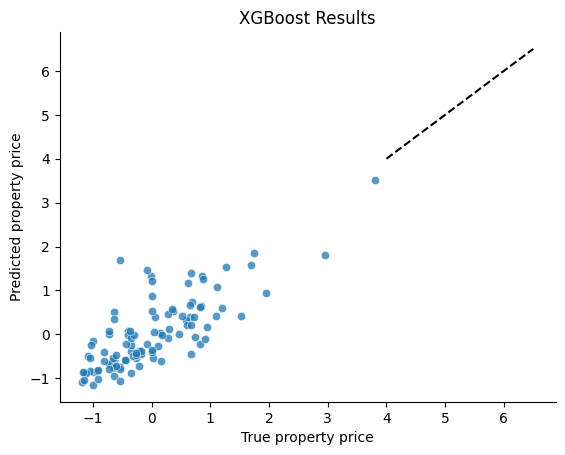

In [92]:
params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}
n = 200
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
)

predicted = model.predict(dtest_reg)
rmse = mean_squared_error(y_test, predicted, squared=False)
print(f"MSE of the base model: {rmse:.3f}", )

sns.scatterplot(x=y_test, y=predicted, alpha=0.75)
x_range = np.linspace(4, 6.5, 10)
sns.lineplot(x=x_range, y=x_range, color='k', ls="--")
plt.xlabel("True property price")
plt.ylabel("Predicted property price")
plt.title("XGBoost Results")
sns.despine()
plt.show()